# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

In [4]:
import tensorflow
tensorflow.__version__

'2.2.0-rc1'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [0]:
#### Add your code here ####
project_path = "/content/drive/My Drive/AIML/Face_Recognition/"

### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
#### Add your code here ####
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile(project_path+'Aligned Face Dataset.zip', 'r') as z:
   z.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
    def to_dict(self):
        return {
            'base': self.base,
            'name': self.name,
            'file': self.file,
        }
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [0]:
metadata_old=metadata
## Total data taking too lang time to execute so we run it on sample data
index = np.random.choice(metadata.shape[0], 1000, replace=False)

In [0]:
metadata=metadata[index]

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

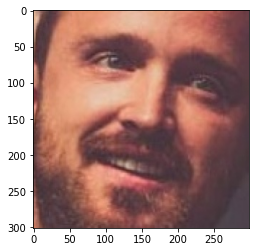

In [16]:
#### Add your code here ####
from matplotlib import pyplot
%matplotlib inline
image = load_image("PINS/pins_Aaron Paul/Aaron Paul0_262.jpg")
pyplot.imshow(image)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
#model = #### Add your code here ####
#### Add your code here ####
model = vgg_face()
model.load_weights(project_path+"vgg_face_weights.h5")

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_13 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 128)    

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [22]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
#### Add your code here ####
def generate_embeddings():
  temp = []
  # Get embedding vector for first image in the metadata using the pre-trained model
  for i in metadata:
    try:
      img_path = i.image_path()
      img = load_image(img_path)

      # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
      img = (img / 255.).astype(np.float32)

      img = cv2.resize(img, dsize = (224,224))

      # Obtain embedding vector for an image
      # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
      embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    except:
      embedding_vector = (2622,)
      np.zeros(embedding_vector)
    temp.append(embedding_vector)
    #print(len(temp))
  return temp

embeddings = generate_embeddings()

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

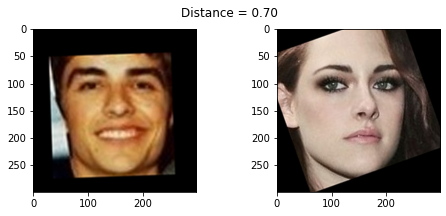

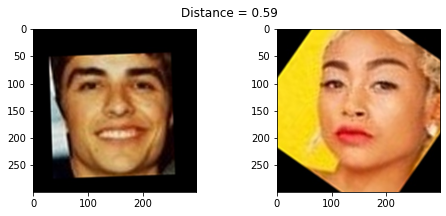

In [25]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
#train_idx = np.arange(metadata.shape[0]) % 9 != 0
#test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Add your code here ####

In [26]:
import pandas as pd

metadata_panda = pd.DataFrame.from_records([m.to_dict() for m in metadata])
metadata_panda.head(10)

,base,name,file
0,PINS,pins_Gwyneth Paltrow,Gwyneth Paltrow46.jpg
1,PINS,pins_Wentworth Miller,Wentworth Miller77.jpg
2,PINS,pins_Dave Franco,Dave Franco186_1451.jpg
3,PINS,pins_kristen stewart face,kristen stewart face14.jpg
4,PINS,pins_Emilia Clarke,Emilia Clarke61_906.jpg
5,PINS,pins_Melissa benoit,Melissa benoit57.jpg
6,PINS,pins_emma watson face,emma watson face75.jpg
7,PINS,pins_Benedict Cumberbatch,Benedict Cumberbatch67.jpg
8,PINS,pins_Sophie Turner,Sophie Turner30_1713.jpg
9,PINS,pins_Emma Stone,Emma Stone105.jpg


In [0]:
y_labels = metadata_panda.name
X = embeddings

### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [28]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(y_labels)
list(lb.classes_)


['pins_Aaron Paul',
 'pins_Alvaro Morte',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_Anna Gunn',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_Brenton Thwaites',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_Dominic Purcell',
 'pins_Dwayne Johnson',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_Gwyneth Paltrow',
 'pins_Henry Cavil',
 'pins_Jason Momoa',
 'pins_Jeremy Renner',
 'pins_Jesse Eisenberg',
 'pins_Jim Parsons',
 'pins_Jon Bernthal',
 'pins_Josh Radnor',
 'pins_Kit Harington',
 'pins_Krysten Ritter',
 'pins_Kumail Nanjiani',
 'pins_Maisie Williams',
 'pins_Mark Ruffalo',
 'pins_Martin Starr',
 'pins_Melissa benoit',
 'pins_Mike Colter',
 'pins_Morena Baccarin',
 'pins_Morgan Freeman',
 'pins_Natalie Portman ',
 'pins_Neil Patrick Harr

In [0]:
y = lb.transform(y_labels)

### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [30]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
print(scaler.mean_)

[ 0.01060552 -0.00022742  0.00271431 ... -0.01504465  0.0061995
  0.01346648]


In [0]:
X_Scale = scaler.transform(X)

In [32]:
feat_cols = ['feature'+str(i) for i in range(X_Scale.shape[1])]
X_Scale_PD = pd.DataFrame(X_Scale,columns=feat_cols)
X_Scale_PD.tail(10)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,...,feature2582,feature2583,feature2584,feature2585,feature2586,feature2587,feature2588,feature2589,feature2590,feature2591,feature2592,feature2593,feature2594,feature2595,feature2596,feature2597,feature2598,feature2599,feature2600,feature2601,feature2602,feature2603,feature2604,feature2605,feature2606,feature2607,feature2608,feature2609,feature2610,feature2611,feature2612,feature2613,feature2614,feature2615,feature2616,feature2617,feature2618,feature2619,feature2620,feature2621
990,-0.367717,-0.821105,-0.120216,-0.161332,1.245217,-0.422911,0.218590,-0.398808,2.472049,0.107306,-0.832781,-1.034309,0.029988,-0.260439,-0.401378,0.259483,-0.192478,-1.169333,-0.468181,0.277205,0.921879,0.581350,0.498123,0.180515,-0.229406,-0.039528,2.339923,0.552757,-1.003936,-0.250529,-0.331296,-0.396434,1.149075,1.512201,-1.884738,-0.860864,-0.995699,0.800336,0.028090,0.385465,...,1.631172,0.869332,0.183608,0.049012,0.651974,0.195708,-1.763162,0.480466,0.736162,0.676691,-1.677665,0.485607,-1.258074,-0.346719,-0.476516,-0.080138,-0.627894,0.033297,0.408340,-0.165677,-0.789585,1.375964,-0.437887,-0.562154,0.395899,-0.793444,0.715756,1.510553,1.472019,0.027758,0.966588,-0.006680,-0.445820,-0.686681,0.132252,1.426798,-0.309592,0.138932,-0.537270,0.491956
991,0.141796,-0.597954,0.289205,-0.123245,-1.220207,-0.677787,-0.060194,-0.205628,-1.018319,-0.153103,-0.781831,-0.111130,-0.637693,0.998985,0.299075,0.349853,-1.679535,-0.505648,-0.303152,-1.009026,-0.515083,-0.370856,-0.430141,-1.556887,-0.523636,-0.383984,-0.431821,-0.163918,0.316706,-0.894155,-1.305509,-0.786108,-1.313027,0.047623,-0.716581,0.524116,-1.031279,0.070149,-0.245287,-0.966019,...,-0.149444,-0.625453,1.004729,0.274980,-1.132427,-0.265108,0.158417,-1.341718,1.203090,0.300489,0.540923,-0.682555,-0.323410,-0.262196,-1.228522,-0.256615,1.402365,-0.102281,-0.028743,-0.260564,-0.245782,0.067739,-0.343439,0.814197,-0.459581,0.503394,0.221602,-0.360004,1.362249,-0.607692,0.042564,-0.564915,0.073741,-1.512330,-0.633176,0.282008,0.216770,-0.144549,-0.577434,-1.197690
992,0.241527,-0.067742,-0.579172,0.474178,0.096614,0.493893,-0.692579,0.633978,-1.453280,1.559422,-1.595717,0.610322,-0.156386,0.090127,0.570821,0.646645,0.533932,-1.117758,1.440146,-0.339277,-1.070521,-0.130224,-0.328177,-0.081018,0.684152,-0.866556,-1.404390,-0.974530,-1.155299,-0.214226,2.561142,0.573948,-0.260204,0.832816,-1.515610,-0.147854,-0.637727,0.030765,0.605050,-0.716345,...,0.864774,-0.454619,0.823722,0.176697,-0.646157,1.340058,-0.133431,-0.801787,0.279685,-0.865367,-0.977228,-0.710766,-1.202635,-0.471578,-1.172759,-0.206285,-0.352009,-1.182629,-0.244250,-0.355307,-0.425476,-0.133099,-1.258579,0.810744,0.762618,0.871215,-0.750869,-0.635937,0.695118,-0.350216,-1.114196,-0.739444,-1.760060,-0.828709,0.939639,0.109440,-1.282607,0.500422,-0.119186,0.113879
993,1.486897,2.219375,0.615901,0.554603,3.846741,2.600684,-1.462262,1.013247,0.608740,0.025324,2.944362,0.471231,2.146896,2.076366,2.106636,2.033666,1.048991,1.005117,-0.249359,-0.395250,1.003494,2.092119,4.100759,4.174717,5.786150,2.986405,0.962221,2.128459,-0.068117,2.382168,1.655786,1.575612,-2.205872,-0.904284,1.900054,-0.462211,0.231680,0.749769,-0.178368,0.584887,...,6.345586,2.114636,-3.141044,4.526465,1.796298,1.266739,-1.526179,2.403726,-1.660805,3.572731,-1.436005,-1.517560,0.627902,0.140081,1.715879,-0.768237,-3.675556,-0.659428,-1.815750,-2.189637,-1.745238,1.629525,-1.308448,-3.566759,1.415713,1.828788,5.109972,1.116619,-0.196457,-2.775907,1.449412,0.178680,-1.148843,2.572940,1.094143,0.204666,-3.234182,-4.439104,3.235430,-1.555042
994,0.177840,-0.977927,-0.445861,-0.631322,

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis

In [33]:
from sklearn.decomposition import PCA

pca_20 = PCA(n_components=20, whiten=True, svd_solver='full')
X_Scale_PCA20 = pca_20.fit_transform(X_Scale)

print(pca_20.explained_variance_ratio_)

[0.1399639  0.05481552 0.04179874 0.03713201 0.03415255 0.03278688
 0.02663233 0.02556007 0.02070824 0.0195918  0.01828189 0.01798039
 0.01632747 0.01575606 0.01461726 0.01369179 0.01293894 0.01254932
 0.01186952 0.01164697]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scale_PCA20, y, test_size=0.10, random_state=1)

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
classifier = clf.fit(X_train, y_train)
print("Best estimator found by grid search:")
print(classifier.get_params)

pred_train = classifier.predict(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best estimator found by grid search:
<bound method BaseEstimator.get_params of GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1000.0, 5000.0, 10000.0, 50000.0, 100000.0],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>


In [36]:
classifier.score(X_train, y_train)

0.9888888888888889

### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [36]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = #### Add your code here ####
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

SyntaxError: ignored

In [37]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_prediction = classifier.predict(X_test[example_idx].reshape(1,-1))
print(example_prediction)

[63]
ERROR! Session/line number was not unique in database. History logging moved to new session 60


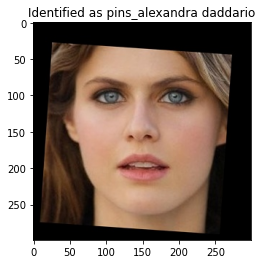

In [38]:
metadata_train, metadata_test, y_train, y_test = train_test_split(metadata, y, test_size=0.10, random_state=1)
example_image = load_image(metadata_test[example_idx].image_path())

example_identity = lb.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');